In [1]:
# Imports 

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [26]:
# Splitting the data 

train_data, test_data = tf.keras.utils.image_dataset_from_directory(
    directory='data',
    labels='inferred',
    label_mode=None,
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.1,
    subset="both",
    seed=1)

ValueError: `subset` must be either "training", "validation" or "both", received: Both

In [16]:
# Data Preprocessing
df_auto_train = data.map(lambda x, y: (x, x))
X_auto_train = df_auto_train.take(int(0.9*len(df_auto_train)))
X_auto_validate = df_auto_train.skip(int(0.9*len(df_auto_train)))
# display(train, noisy_train_data)

In [17]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 14, 14, 32)        9248

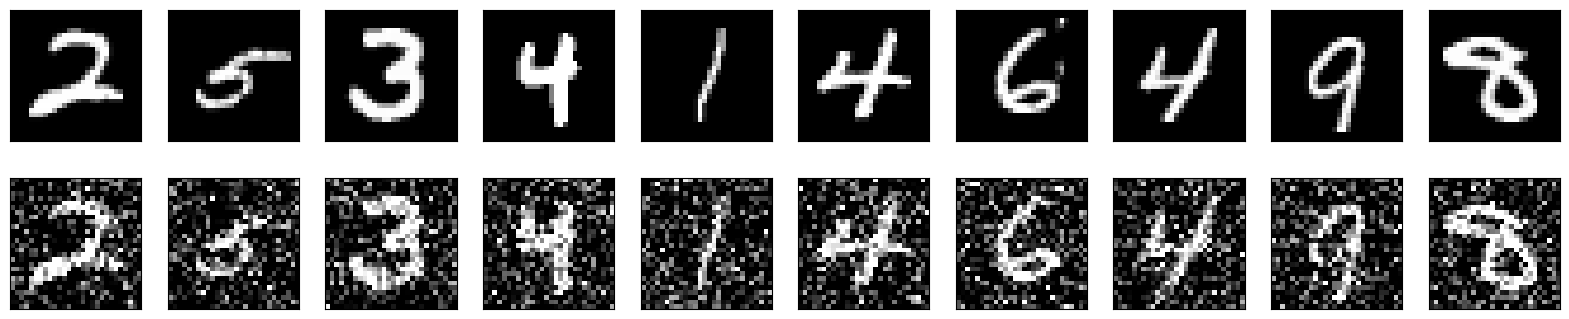

In [18]:
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [21]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1005 - val_loss: 0.0747
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0936 - val_loss: 0.0743
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0919 - val_loss: 0.0727
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0909 - val_loss: 0.0720
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0901 - val_loss: 0.0715
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0896 - val_loss: 0.0713
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0891 - val_loss: 0.0710
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0887 - val_loss: 0.0708
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0884 - val_loss: 0.0706
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0881 - val_loss: 0.0708

313/313 [==============================] - 1s 1ms/step


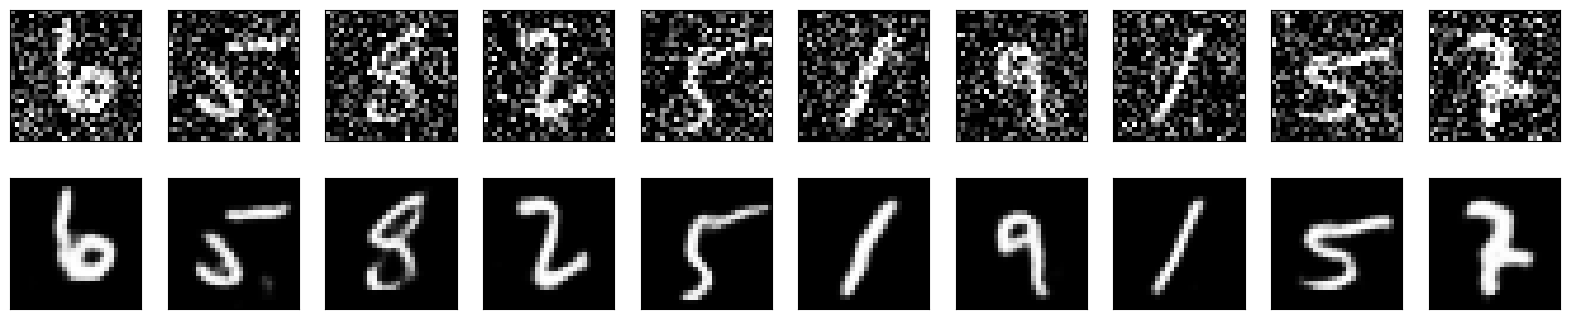

In [22]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)